<a href="https://colab.research.google.com/github/Priyanka-Gangadhar-Palshetkar/probability/blob/main/Monty_Hall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Monty Hall simulation

We will continue looking at the [Monty Hall problem](https://en.wikipedia.org/wiki/Monty_Hall_problem) from last week: 

> Suppose you're on a game show, and you're given the choice of three doors: Behind one door is a car; behind the others, goats. You pick a door, say No. 1, and the host, who knows what's behind the doors, opens another door, say No. 3, which has a goat. He then says to you, "Do you want to pick door No. 2?" Is it to your advantage to switch your choice?

We have already learned that the probability that it is advantageous to switch by enumerating all the possible outcomes and counting the outcomes where switching was advantageous:

#### Solution tree

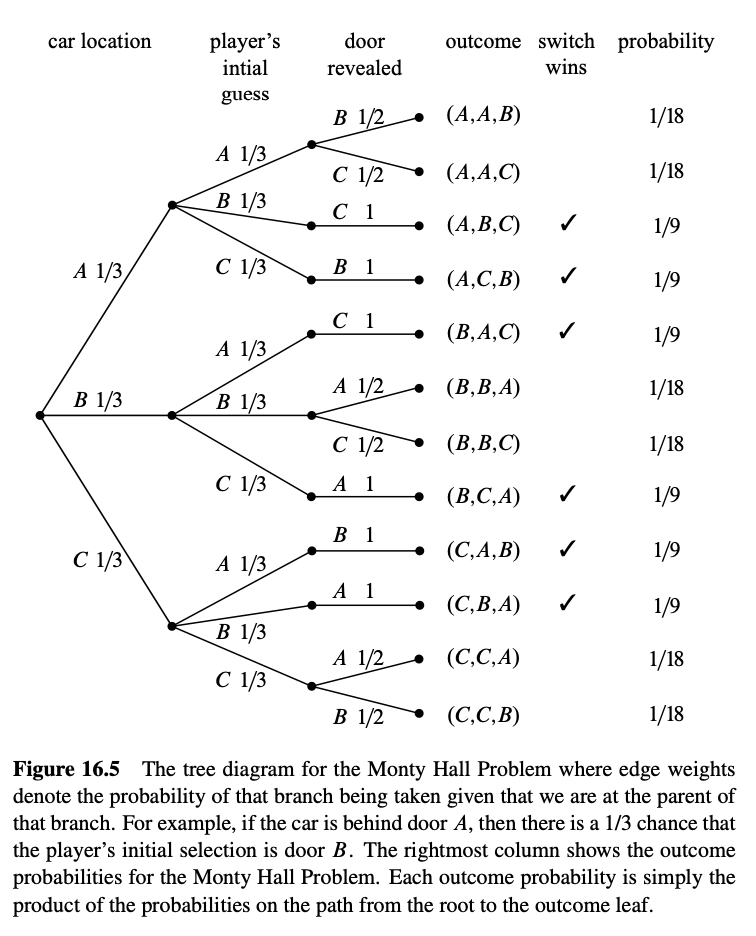


(Figure from *Mathematics for Computer Science* by Lehman, Leighton & Meyer)

## Simulation

**Task**: Create a function for simulating a Monty Hall game for a given **strategy**.

1. Pick a random door concealing the car
2. Pick a random door initially chosen by the player
3. Pick a random* door revealed by the host (\*remember it still needs to have the goat but be different from the player's pick)
4. Return the outcome (did the player win?) for the chosen **strategy**.

Simulate the strategy 10000 times and record the relative frequency of winning.

**Strategies**:
1. [Stay] Player always stays with the original choice (following the belief that it is advantageous to stick with the original choice);
2. [Switch] Player always switches to the other door (following the belief that it is advantageous to switch);
3. [Indifferent] Player either stays with the original choice or switches with probability 0.5 (representing indifference between staying and switching).

**Format**:
* Solving the problem in groups: 20-30 minutes
* Discussion: 20 minutes

In [ ]:
import numpy as np

def monty_hall(strategy="indifferent", num_of_games=10000):
  no_of_wins = 0
  for _ in range(num_of_games):
    # Door with the car
    car_door = np.random.choice(3)

    # Player's choice
    player_door = np.random.choice(3)

    # Door revealed by the host
    revealed_door = np.delete(np.arange(3), [car_door, player_door])[0]

    # Remaining Door
    remaining_door = np.delete(np.arange(3), [player_door, revealed_door])[0]

    # Final player's door (depending on strategy)
    if strategy == "stay":
      final_door = player_door
    elif strategy == "switch":
      final_door = remaining_door
    else:
      final_door = remaining_door if np.random.binomial(1, 0.5) else player_door

    player_won = (final_door == car_door)
    if player_won:
      no_of_wins += 1
  
  freq_win = no_of_wins/num_of_games
  
  return freq_win

In [28]:
#Tests
for strategy in ['stay', 'switch', 'indifferent']:
  freq_win = monty_hall(strategy, 10000)
  print("Relative frequency of winning for strategy %s is %f" % (strategy, freq_win))

Relative frequency of winning for strategy stay is 0.334900
Relative frequency of winning for strategy switch is 0.676100
Relative frequency of winning for strategy indifferent is 0.500400
